# Energy balances

In this lecture, we will examine how to use Python to help perform energy balances.

## Problem 5.3

We consider the combustion reaction of methane, which is given by:
\begin{align*}
{\rm CH}_4 + 2{\rm O}_2
\longrightarrow
{\rm CO}_2 + 2 {\rm H_2O}
\end{align*}



In [ ]:
# Hf is a dictionary of the heat of formation for each species
Hf = {}
Hf['CH4'] = -17.88e3  # cal mol^{-1}
Hf['CO2'] = -94.05e3
Hf['H2O'] = -57.80e3
Hf['O2'] = 0.0
Hf['N2'] = 0.0

# Cp_data is a dictionary containing the specific heat capacity for each species
Cp_data = {}
Cp_data['CH4'] = 0.0 
Cp_data['CO2'] = 10.0  # cal mol^{-1}
Cp_data['H2O'] = 9.0
Cp_data['O2'] = 7.5
Cp_data['N2'] = 7.4

T0 = 298.15  # reference temperature / K

molecule_list = list( Cp_data.keys() )  # This is a 
print(molecule_list)

excess = 200  # This is the percentage excess air fed to the system

# The variable nu is the
nu = {mol: 0.0 for mol in molecule_list}
nu['CH4'] = -1.0
nu['O2'] = -2.0
nu['CO2'] = 1.0
nu['H2O'] = 2.0




['CH4', 'CO2', 'H2O', 'O2', 'N2']
input moles
{'CH4': 1.0, 'CO2': 0.0, 'H2O': 0.0, 'O2': 6.0, 'N2': 22.571428571428573}
-17880.0 -186730.84
[1150.35289487]
877.2028948704927


From a mole balance, we can determine the moles of each species
exiting the system $N_k^{\rm out}$ from the moles entering the system $N_k^{\rm in}$ from knowledge of the extent of reaction $\alpha$:
\begin{align*}
N_{\rm CH_4}^{\rm out}
&= N_{\rm CH_4}^{\rm in}
- \alpha
\\
N_{\rm O_2}^{\rm out}
&= N_{\rm O_2}^{\rm in}
- 2\alpha
\\
N_{\rm CO_2}^{\rm out}
&= N_{\rm CO_4}^{\rm in}
+ \alpha
\\
N_{\rm H_2O}^{\rm out}
&= N_{\rm H_2O}^{\rm in}
+ 2 \alpha
.
\end{align*}
These equations can be written compactly in terms of the stoichiometric coefficient $\nu_\alpha$ of each species in the reaction:
\begin{align*}
N_k^{\rm out}
&= N_k^{\rm in}
+ \nu_k \alpha
\end{align*}
The stoichiometric coefficients of reactants are negative, they are
positive for products, and for species that do not participate in the reaction, they are negative.




In [ ]:
# N_in is a dictionary for the number of moles of each species entering the system
N_in = {mol: 0.0 for mol in molecule_list}
N_in['CH4'] = 1.0
N_in['O2'] = 2.0*(1.0+excess/100.0)
N_in['N2'] = N_in['O2']*79/21
print('input moles')
print(N_in)


alpha = 1.0   # extent of reaction

# The output number of moles depends on the stoichometric coefficient
N_out = {mol: N_in[mol] + nu[mol]*alpha for mol in molecule_list}


# This function returns the specific heat capacity of a pure species at a set temperature.  
# Note that in this particular case, the heat capacity is independent of temperature.
def get_Cp_pure(T, mol):
  return Cp_data[mol]


# This function returns the molar enthalpy of a pure species at a set temperature.
def get_H_pure(T, mol):
  H = Hf[mol] +  Cp_data[mol]*(T-T0)
  return H


import numpy as np
import pylab as plt

# This function returns the dot product of two vectors.
def dot_product(vec1, vec2):
    dot = [x1*x2 for x1, x2 in zip(vec1, vec2)]
    return sum(dot)

# This function returns the total enthalpy of a mixture at a particular temperature and set of mole numbers.
def get_H(T, N):
  N_vec = list(N.values())
  H_vec = [get_H_pure(T, mol) for mol in molecule_list]
  return dot_product(N_vec, H_vec)

T = 298.15
Tout = 400
H_in = get_H(T, N_in)
H_out = get_H(Tout, N_out)
print(H_in, H_out)

from scipy.optimize import fsolve


def accumulation(T):
  H_in = get_H(T0, N_in)
  H_out = get_H(T, N_out)
  return H_in - H_out


Tout = fsolve(accumulation, T0)  
print(Tout)
print(float(Tout)-273.15)

We can combine all our calculations in a loop to determine how the adiabatic flame temperature depends on the excess air that is fed with the fuel.  

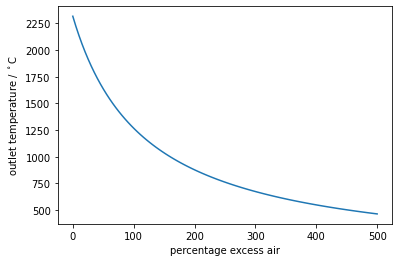

In [ ]:
excess_list = np.linspace(0.0, 500, 100)

Tout_list = []

for excess in excess_list:

  N_in = {mol: 0.0 for mol in molecule_list}
  N_in['CH4'] = 1.0
  N_in['O2'] = 2.0*(1.0+excess/100.0)
  N_in['N2'] = N_in['O2']*79/21

  alpha = 1.0
  N_out = {mol: N_in[mol] + nu[mol]*alpha for mol in molecule_list}


  def accumulation(T):
    H_in = get_H(T0, N_in)
    H_out = get_H(T, N_out)
    return H_in - H_out
  T0 = 25.0
  solution = fsolve(accumulation, T0)
  Tout_list.append(float(solution))

plt.plot(excess_list, Tout_list)
plt.ylabel(r'outlet temperature / $^\circ$C')
plt.xlabel(f'percentage excess air')
plt.show()


We can also determine how the outlet temperature of the reactor depends on the extent $\alpha$ of the combustion reaction.

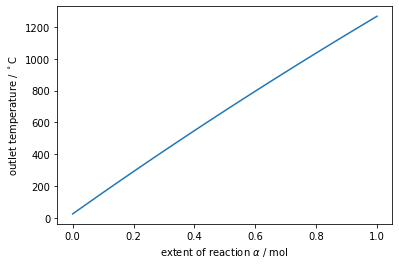

In [ ]:

excess = 100
alpha_list = np.linspace(0.0, 1.0, 100)

Tout_list = []

for alpha in alpha_list:

  N_in = {mol: 0.0 for mol in molecule_list}
  N_in['CH4'] = 1.0
  N_in['O2'] = 2.0*(1.0+excess/100.0)
  N_in['N2'] = N_in['O2']*79/21

  N_out = {mol: N_in[mol] + nu[mol]*alpha for mol in molecule_list}


  def accumulation(T):
    H_in = get_H(T0, N_in)
    H_out = get_H(T, N_out)
    return H_in - H_out
  T0 = 25.0
  solution = fsolve(accumulation, T0)
  Tout_list.append(float(solution))

plt.plot(alpha_list, Tout_list)
plt.ylabel(r'outlet temperature / $^\circ$C')
plt.xlabel(r'extent of reaction $\alpha$ / mol')
plt.show()


## Problem 5.4


In this problem, we examine the oxidation of carbon monoxide:
\begin{align*}
{\rm CO} + \frac{1}{2} {\rm O}_2
\longrightarrow
{\rm CO}_2
\end{align*}

The data for the problem are summarized in the code block below.

In [9]:
# These are the heat capacity data given in the problem.
T_data = [32, 60, 77, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]
Cp_data = {}
Cp_data['N2'] = [6.959, 6.96, 6.96, 6.961, 6.964, 6.97, 6.984, 7.002, 7.036, 7.055, 7.057, 7.122, 7.153, 7.197, 7.236, 7.277, 7.317, 7.356, 7.395, 7.433, 7.471, 7.502, 7.542]
Cp_data['O2'] = [6.989, 6.996, 7.002, 7.01, 7.052, 7.102, 7.159, 7.22, 7.283, 7.347, 7.409, 7.47, 7.529, 7.584, 7.637, 7.688, 7.736, 7.781, 7.824, 7.865, 7.904, 7.941, 7.976]
Cp_data['Air'] = [6.946, 6.948, 6.949, 6.952, 6.963, 6.978, 7.001, 7.028, 7.06, 7.096, 7.134, 7.174, 7.214, 7.256, 7.298, 7.341, 7.382, 7.422, 7.461, 7.5, 7.537, 7.573, 7.608]
Cp_data['H2'] = [6.838, 6.855, 6.864, 6.876, 6.921, 6.936, 6.942, 6.961, 6.964, 6.978, 6.981, 6.984, 6.989, 6.993, 7.004, 7.013, 7.032, 7.054, 7.061, 7.073, 7.081, 7.093, 7.114]
Cp_data['CO'] = [6.96, 6.961, 6.962, 6.964, 6.972, 6.987, 7.007, 7.033, 7.065, 7.101, 7.14, 7.182, 7.224, 7.268, 7.312, 7.355, 7.398, 7.439, 7.48, 7.519, 7.558, 7.595, 7.631]
Cp_data['CO2'] = [8.595, 8.652, 8.715, 8.793, 9.091, 9.362, 9.612, 9.844, 10.06, 10.262, 10.45, 10.626, 10.792, 10.948, 11.094, 11.232, 11.362, 11.484, 11.6, 11.71, 11.81, 11.91, 12.01]
Cp_data['H2O'] = [8.001, 8.008, 8.012, 8.019, 8.055, 8.101, 8.154, 8.21, 8.274, 8.341, 8.411, 8.484, 8.558, 8.634, 8.712, 8.79, 8.87, 8.95, 9.029, 9.107, 9.185, 9.263, 9.339]

# These are the data for the heat of formation
Hf = {}
Hf['N2'] = 0.0
Hf['O2'] = 0.0
Hf['H2'] = 0.0
Hf['CO'] = -26.416e3   # Btu lbmol^{-1}
Hf['CO2'] = -94.052e3
Hf['H2O'] = -57.80e3
Hf['Air'] = 0.0
 
# This creates a list of molecules in the system. 
molecule_list = list( Cp_data.keys())

# Stoichiometric coefficients for the oxidation reaction of carbon monoxide
nu = {mol: 0.0 for mol in molecule_list}
nu['CO'] = -1
nu['O2'] = -0.5
nu['CO2'] = 1



Let's just plot all our heat capacity data:

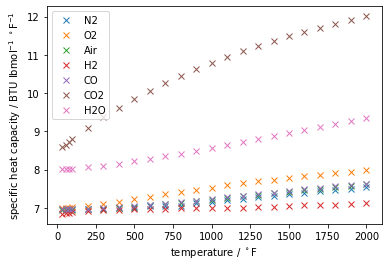

In [12]:
import pylab as plt


for mol in molecule_list:
    plt.plot(T_data, Cp_data[mol], label=mol, linestyle='None', marker='x')
plt.legend()
plt.xlabel(r'temperature / $^\circ$F')
plt.ylabel(r'specific heat capacity / BTU lbmol$^{-1}$ $^\circ$F$^{-1}$')
plt.show()

### Fitting the data

It would be much more convenient to use a function that returns the heat capacity, rather than using a table of data.  We can create such a function by getting Python to perform a spline fit through the data.  This uses the functions `splrep`, `splev`, and `splint` from the Python library `scipy.interpolate`.

T=304, Cp = 6.9704356106218635 BTU/(lbmol F)


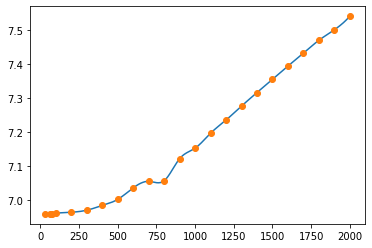

T=77, H = 1580.8748485232984 BTU/lbmol


In [13]:
import numpy as np
import pylab as plt
from scipy.optimize import fsolve

# This imports the functions splrep, splev, and splint from the library scipy.interpolate.
from scipy.interpolate import splrep, splev, splint  


# Let's fit the heat capacity data for nitrogen.
mol = 'N2'

# The function splrep (short for spline representation) takes two lists, one containing a list of x coordinates, 
# and the other containing a list of y values.
# In this case, this is just the list of temperatures and heat capacities.
# The function splrep then returns a variable Cp_fit that can be used to perform interpolation of the data.
Cp_fit = splrep(T_data, Cp_data[mol])  

# To evaluate the heat capacity at any temperature, we just use the function splev (short for spline evaluate).  
# This function takes two arguments.  The first is the temperature at which you want the heat capacity, and the second argument
# is a variable that "contains the fit", which was generated by the function splrep.  In this case this variable is Cp_fit.
T = 304
Cp = splev(T, Cp_fit)
print(f'T={T} F, Cp = {Cp} BTU/(lbmol F)')

# Let's compare the interpolated function to the data in the table.
T_list = np.linspace(100, 2000, 500)
Cp_list = [splev(T, Cp_fit) for T in T_list]
plt.plot(T_list, Cp_list)
plt.plot(T_data, Cp_data[mol], 'o')
plt.show()

# We can also integrate our spline fit by using the function splint (short for spline integration).  
# This function takes three arguments.  The first is the start of the integration, the second is the end of the integration,
# and the final argument is the "fit" variable.
# The following calculates the enthalpy of nitrogen.
T0 = 77
H = Hf[mol] + splint(T0, T, Cp_fit)
print(f'T={T0} F, H = {H} BTU/lbmol')


### Tools

As in the previous problem, we will create functions that allow us to calculate the heat capacity and enthalpy of the system at any temperature and composition.

In [14]:
def get_Cp_pure(T, molecule):
    return splev(T, Cp_fit[molecule])


def get_H_pure(T, molecule):
    T0 = 77.0
    H = Hf[molecule]
    H += splint(T0, T, Cp_fit[molecule])
    return H



def dot_product(vec1, vec2):
    dot = [x1*x2 for x1, x2 in zip(vec1, vec2)]
    return sum(dot)

def get_Cp(T, N):
    N_vec = [N[mol] for mol in molecule_list]
    return dot_product(N_vec, Cp_vec)

#def get_H(T, N):
#    H = 0.0
#    for mol in molecule_list:
#        H += N[mol]*get_H_pure(T, mol)
#    return H

def get_H(T, N):
    N_vec = [N[mol] for mol in molecule_list]
    H_vec = [get_H_pure(T, mol) for mol in molecule_list]
    return dot_product(N_vec, H_vec)


These tools should now allow you to solve the problem.  You should try to test everything by hand first to make sure that things work the way you expect them to.